In [34]:
import pandas as pd
df = pd.DataFrame({'A':['가','나','다'],'B':['a','b','c'], 'C':[0, 1, 2]})
df1 = pd.DataFrame({'A':['라','마','바'],'B':['d','e','f']})
df2 = pd.DataFrame({'C':['1','2','3'],'D':['q','w','e']})

## [[[1_main1]]]

2_4) Encoding Categorical Variables 부분

Label Encoding vs One-Hot Encoding

## Label Encoding
- 글자를 숫자로 바꿔주는 거

In [2]:
from sklearn.preprocessing import LabelEncoder
 

encoder = LabelEncoder()
encoder.fit(df['A'])
df['A'] = encoder.transform(df['A'])

df

,A,B
0,0,a
1,1,b
2,2,c


## One-Hot Encoding
**Loss를 계산하기 쉽게 만들어 주기 위해** 벡터의 요소 하나만 1 이고, 나머지 요소는 모두 0 인 벡터로 만들어 주는 것

In [6]:
from keras.utils import np_utils
 
df['A'] = np_utils.to_categorical(df['A'])
df

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\lsl\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\lsl\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\lsl\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\lsl\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\lsl\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lsl\Ana

TypeError: can only concatenate str (not "list") to str

https://3months.tistory.com/207 추가하기

2_5) Aligning Training and Testing Data 부분

## align

DataFrame.align(self, other, join='outer', axis=None, level=None, copy=True, fill_value=None, method=None, limit=None, fill_axis=0, broadcast_axis=None)
- **other** : DataFrame or Series
- **join** : {‘outer’, ‘inner’, ‘left’, ‘right’}, default ‘outer’
- **axis** : index (0), columns (1)
- **level** : int or level name, default None
- **copy** = bool, default True
- **fill_value** : scalar, default np.NaN

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.align.html

In [35]:
df

,A,B,C
0,가,a,0
1,나,b,1
2,다,c,2


In [36]:
df1

,A,B
0,라,d
1,마,e
2,바,f


In [30]:
df.align(df1, join='inner', axis=1)

(   A  B
 0  0  a
 1  1  b
 2  2  c,    A  B
 0  라  d
 1  마  e
 2  바  f)

In [37]:
df, df1 = df.align(df1, join='inner', axis=1)

In [38]:
df

,A,B
0,가,a
1,나,b
2,다,c


In [39]:
df1

,A,B
0,라,d
1,마,e
2,바,f


2_7_1) Effect of Age on Repayment 부분

## pd.cut() : 동일 길이로 나누기

In [13]:
import numpy as np
import pandas as pd

df3 = pd.DataFrame({'col_1': np.random.random(10), 

                'col_2': np.random.random(10)})
df3.head(3)

,col_1,col_2
0,0.437872,0.693627
1,0.492655,0.573494
2,0.135428,0.790640


In [14]:
#  5개의 동일한 길이로 범주를 만들기
cut = pd.cut(df3.col_1, 5)
cut

0     (0.393, 0.549]
1     (0.393, 0.549]
2    (0.0815, 0.238]
3      (0.705, 0.86]
4     (0.549, 0.705]
5     (0.238, 0.393]
6      (0.705, 0.86]
7    (0.0815, 0.238]
8      (0.705, 0.86]
9      (0.705, 0.86]
Name: col_1, dtype: category
Categories (5, interval[float64]): [(0.0815, 0.238] < (0.238, 0.393] < (0.393, 0.549] < (0.549, 0.705] < (0.705, 0.86]]

In [15]:
grouped_col_1 = df3.col_1.groupby(cut)

grouped_col_1.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
col_1,,,,,
"(0.0815, 0.238]",2,0.108873,0.037555,0.082317,0.135428
"(0.238, 0.393]",1,0.373584,NaN,0.373584,0.373584
"(0.393, 0.549]",2,0.465264,0.038738,0.437872,0.492655
"(0.549, 0.705]",1,0.555400,NaN,0.555400,0.555400
"(0.705, 0.86]",4,0.765244,0.068430,0.711667,0.860210


- np.linspace() : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성

In [16]:
c = np.linspace(20, 70, 11)   # start, end, num-points 
c

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

## pd.qcut() : 동일 개수로 나누기

- labels=False : label이 0, 1, 2, 3 이런 식으로 0부터 순차적으로 1씩 증가

In [17]:
# 각 범주별로 동일하게 5개의 개수를 가지도록 범주 나누기
qcut = pd.qcut(df3.col_2, 5, labels=False)
qcut

0    3
1    2
2    3
3    4
4    2
5    0
6    1
7    1
8    4
9    0
Name: col_2, dtype: int64

- labels=np.arange(5, 0, -1)로 직접 지정을 해주면 label이 5, 4, 3, 2, 1 이런식으로 5부터 1씩 줄어드는 순서로 할당

In [18]:
qcut_2 = pd.qcut(df3.col_2, 5, labels=np.arange(5, 0, -1))
qcut_2

0    2
1    3
2    2
3    1
4    3
5    5
6    4
7    4
8    1
9    5
Name: col_2, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

5. Light Gradient Boosting Machine 부분

## LightGBM

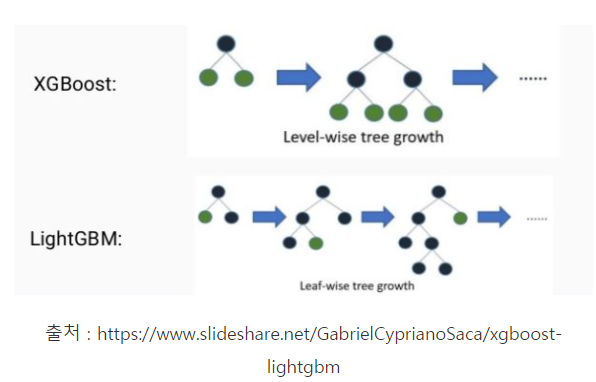

- xgboost는 성능은 좋지만 학습시간이 느리다는 단점이 있음
- LightGBM : 대용량 처리가 가능하고 빠름

<파라미터>
- n_estimators : 반복하려는 트리의 개수
- learning_rate : 학습률
- max_depth : 트리의 최대 깊이
- min_child_samples : 리프 노드가 되기 위한 최소한의 샘플 데이터 수
- num_leaves : 하나의 트리가 가질 수 있는 최대 리프 ㄱ수
- feature_fraction : 트리를 학습할 때마다 선택하는 feature 의 비율
- reg_lambda : L2 regularization
- reg_alpha : L1 regularization

In [ ]:
from lightgbm import LGBClassifier, plot_importance

lgb = LGBClassifier(n_estimators = 100)
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)
metrics(y_testm lgb_pred)

## gc
가비지 수거기 인터페이스

- gc.enable()
자동 가비지 수거를 활성화합니다.

- gc.disable()
자동 가비지 수거를 비활성화합니다.

- gc.isenabled()
Return True if automatic collection is enabled.

- gc.collect(generation=2)
인자가 없으면, 전체 수거를 실행

## [[[2_main2]]]

2_1) Kernel Density Estimate Plots 부분

## .ix 인덱싱
- integer position과 label 둘 다 사용하여 행에 접근하는 메서드
- 만약 label이 숫자라면 label-based index만 된다.
   - .loc : label 이용
   - .iloc : integer position 이용

(최근 버전에서는 사용하지 말 것을 권함)

In [19]:
df4 = pd.DataFrame([['가','나','다'],['a','b','c'],['1','2','3']],index=['r0','r1','r2'], columns = ['c0','c1','c2'])
df4.head()

,c0,c1,c2
r0,가,나,다
r1,a,b,c
r2,1,2,3


1) integer position 이용

In [20]:
df4.ix[1,1]

C:\Users\lsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\lsl\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


'b'

2) label 이용

In [21]:
df4.ix['r1','c1']

C:\Users\lsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'b'

3) integer position과 label 이용

In [22]:
df4.ix['r1',1]

C:\Users\lsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'b'

## [[3_Main3]]

## pd.factorize
계열을 정수 식별자로 변환하기를 원하면 pd.factorize를 사용